# Computer vision - Laboratory

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics are:

1)	Segmentation of video shots with static scenes.

2) Background substraction.

3)	Segmentation of images.

In order to successfuly complete this practicum it is necessary to understand the following theory concepts: background substraction, K-means clustering, etc.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.

## 3.1 Background substraction methods


Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, remove all the "artifacts" considered as foreground related to movement extracting the background images.

Note: One of the applications of these methods is the button "remove tourists" implemented in most commercial photo cameras. For instance, Adobe uses the "Monument Mode", which automatically deletes the people going by the cameras.

Read and visualize the sequence of images "images/Barcelona-sequence"
Hint: In order to read a  collection of images, we wil use the function animation.FuncAnimation [https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html].

Observe in the following example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

<IPython.core.display.Javascript object>


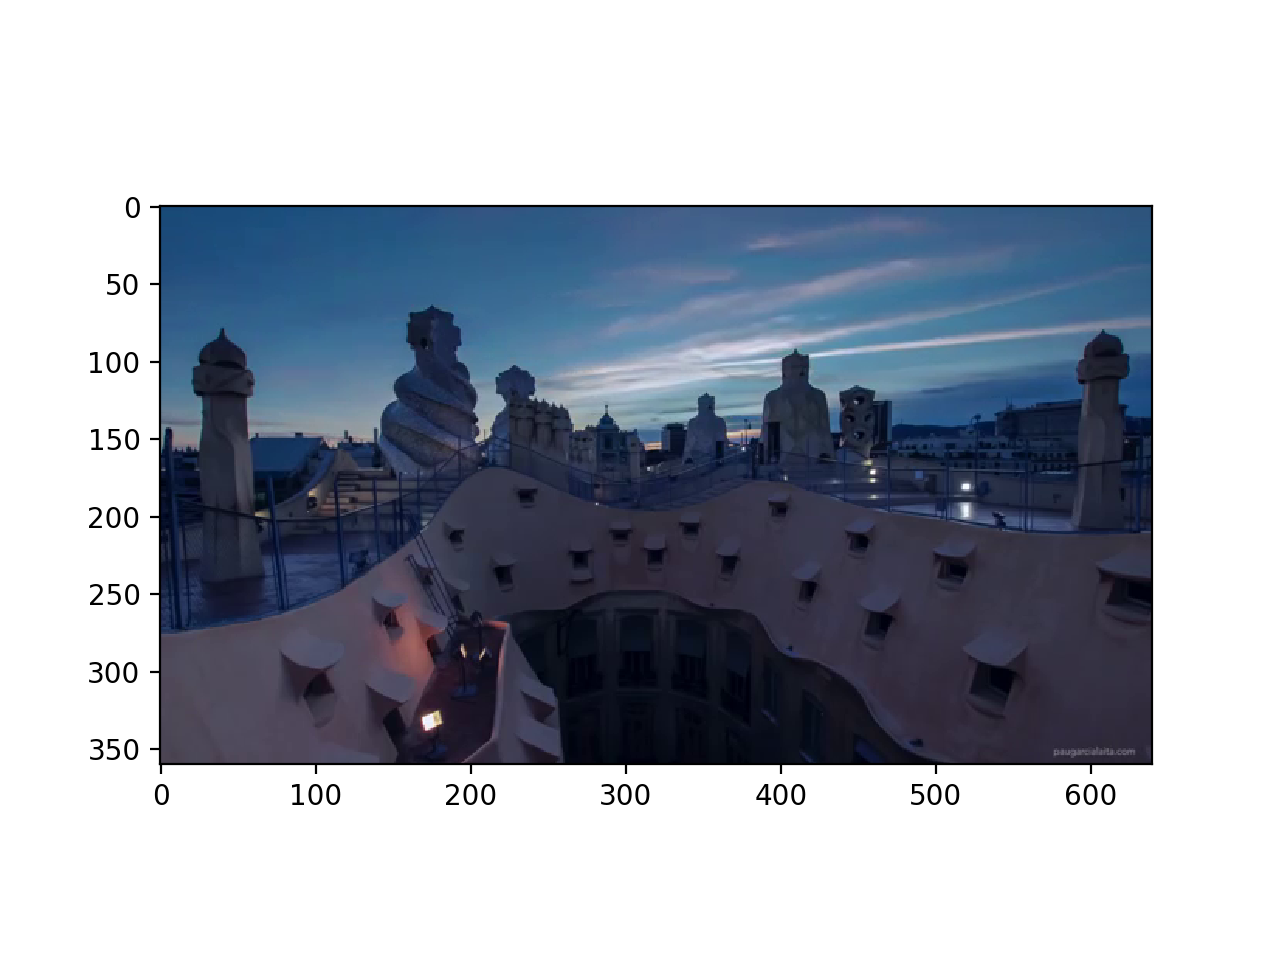

In [1]:
import numpy as np
import skimage
from skimage import io
from skimage import exposure
from skimage import img_as_float
import matplotlib.pyplot as plt
from numpy import linalg as LA

ic = io.ImageCollection('images/Barcelona-sequence/*.png')
        # Reading a sequence of images from a folder

import matplotlib.animation as animation
%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

i=0       #Inicializing the video display
fig = plt.figure()  # Create figure
im = plt.imshow(ic[i], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(ic[i*5]) #Changing the content of the canvas
    return im, #to return a tuple!

ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=False, frames=50, repeat= False)
plt.show()

a) Find where a shot (scene) finishes and the following starts (boundaries). Each of the scenes in a video is usually called 'shot'. Which measure can be used in order to visually distinguish the shots in a plot? Explain your solution.

Show the initial and final images of each shot extracted as follows:

<img src="images_for_notebook/result_shot_detection.png">

**Hint:** take the following example of video and temporal plot visualization as a template. The plot must be replaced by a frame by frame measure to be defined by you, being applicable to distinguish the shots.

- If you need to convert the image to float, the command is: img_as_float()
- If you need the histogram, it is in skimage.exposure

<IPython.core.display.Javascript object>


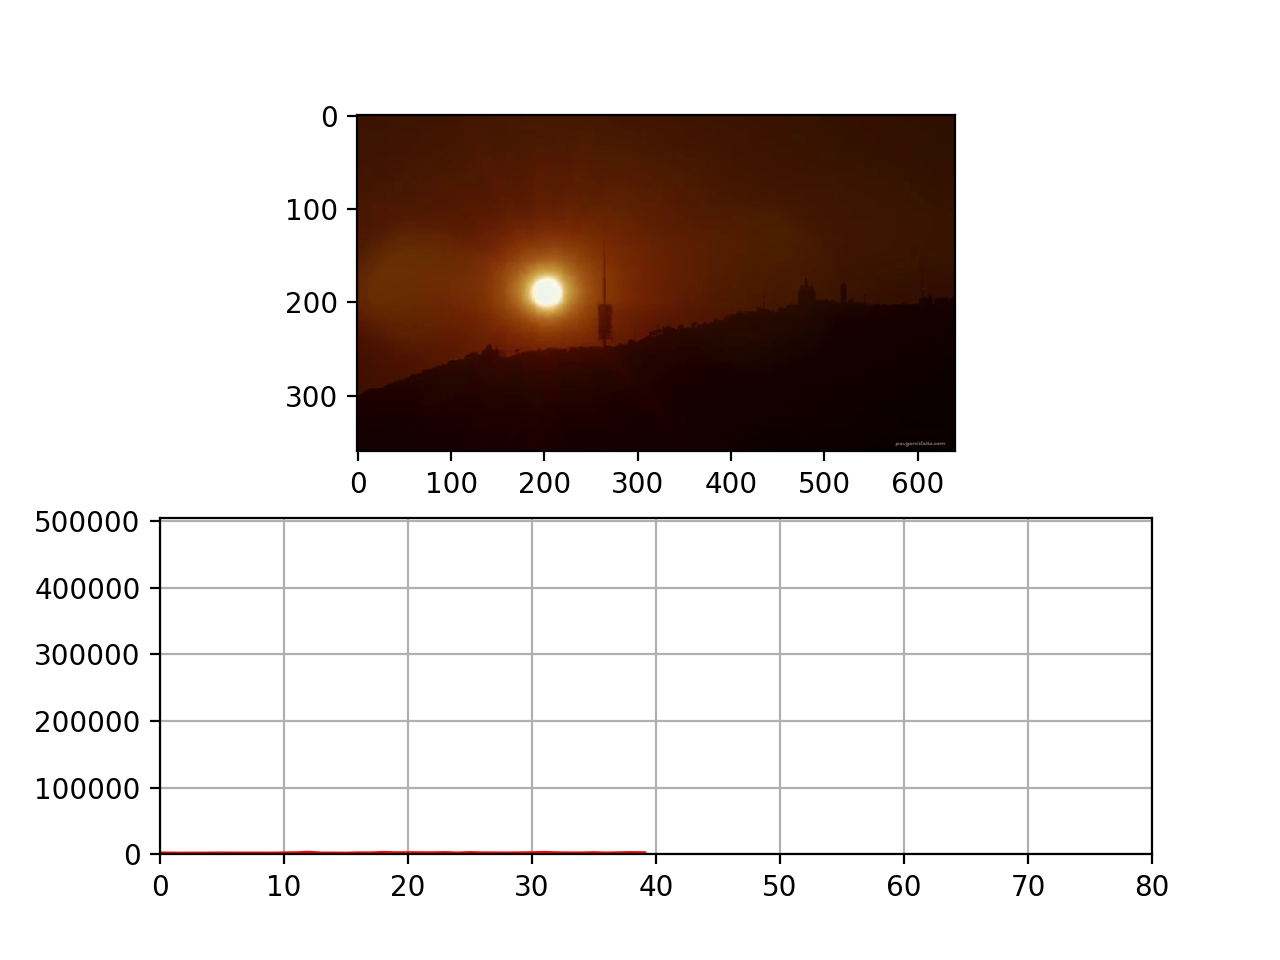

In [3]:


data=[] #array containing de difference between images
for i in range(len(ic)):
    if (i != len(ic)-1):#if last image we subtract the first from the last
        hist1 = exposure.histogram(img_as_float(ic[i+1]),8)
        hist2 = exposure.histogram(img_as_float(ic[i]),8)
        data.append(LA.norm(hist1[0] - hist2[0]))
    else:#for the rest
        hist1 = exposure.histogram(img_as_float(ic[0]),8)
        hist2 = exposure.histogram(img_as_float(ic[i]),8)
        data.append(LA.norm(hist1[0] - hist2[0]))#we substract the next with the previous

%matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(min(data), max(data)) #we set the maximum value the histogram plot will achieve in the y axis
ax2.set_xlim(0, 5)
ax2.grid()
i = 0
# initialize the data arrays 
xdata, ydata = [], []
def run(i):
    xdata.append(i) # time = x axis
    ydata.append(data[i]) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if i >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, blit=True, interval=1, repeat=False)
plt.show()

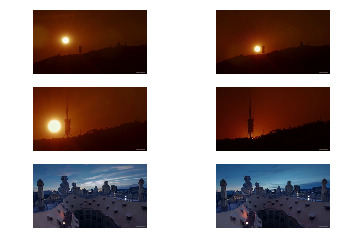

In [5]:
%matplotlib inline
shots = [] #array containing all the different shots of the video
array = np.array(hist_diff)
cambios = array[array > 10000] #we search for the highest histograms differences
last_img_ind1 = 0
for cambio in cambios: 
    last_img_ind2 = hist_diff.index(cambio)+1
    shot = ic[last_img_ind1:last_img_ind2]#we can cut the video into shots, by slicing the ImageCollection by the position
                                         #of the highest histogram differences
    if (len(shot) > 10): #we know it will be a shot if its longer than 10 frames
        shots.append(shot)
    last_img_ind1 = last_img_ind2


f, axarr = plt.subplots(3, 2) #in order to display the images in a grid we create an array of axes.
for i in range(len(shots)):
    
    axarr[i, 0].imshow(shots[i][0])
    axarr[i, 1].imshow(shots[i][-1])
    axarr[i,0].set_axis_off()
    axarr[i,1].set_axis_off()

plt.show()

We are using the histogram difference to see where the scene changes. If the value is very high (in our case, we expect 10000 > ) we know the shot changed because the color distribution of each frame (the last of the previous shot and the first of the next one) changes drastically.

## 3.2 Background substraction

Apply the background substraction algorithm (check theory material).

Visualize, for each shot of the video:
    1) images belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

In [6]:
#np.median
from skimage.filters import threshold_adaptive

shots_back = [] #this list will contain the backgrounds of each shot.
for shot in shots:
    background = np.zeros(shot[0].shape) #initialize an array with 0 shaped like the ones in ic.
    red_channel = [shot[0][:,:,0]]
    green_channel = [shot[0][:,:,1]]
    blue_channel = [shot[0][:,:,2]]
    for i in range(1,len(shot)):  #separate each image into 3 channels
        red_channel.append(shot[i][:,:,0])
        green_channel.append(shot[i][:,:,1])
        blue_channel.append(shot[i][:,:,2])
    background[:,:,0] = np.median(red_channel,axis = 0)#adding the median of each channel into background to create the final image.
    background[:,:,1] = np.median(green_channel,axis = 0)
    background[:,:,2] = np.median(blue_channel,axis = 0)
    shots_back.append(background)
    



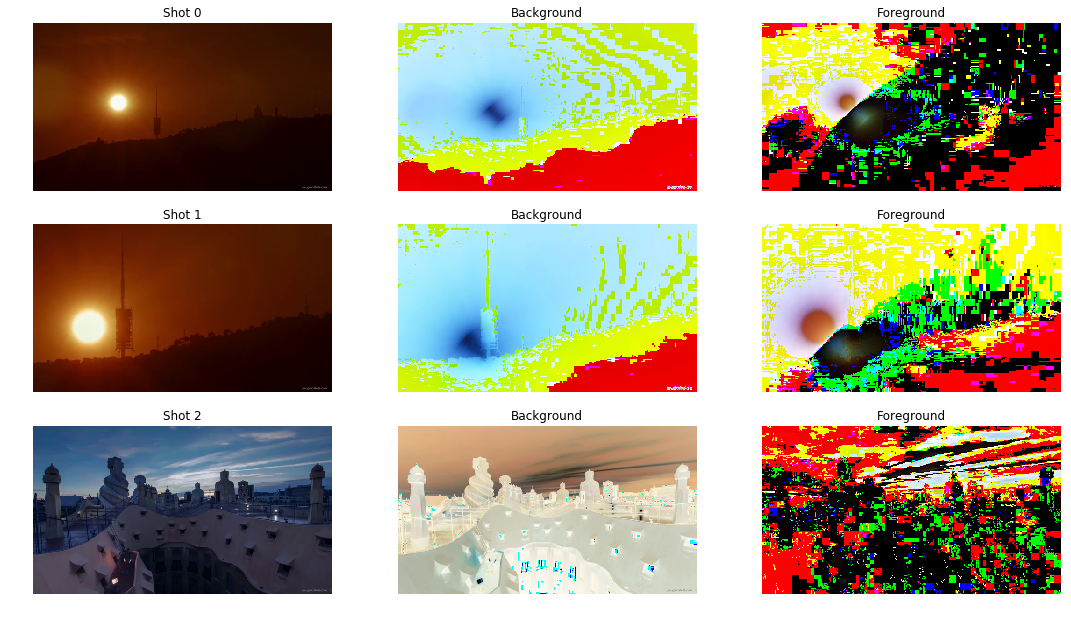

"We don't know if this is exactly how the background and the foreground should look like."

In [57]:
%matplotlib inline
f, axarr = plt.subplots(3, 3) #in order to display the images in a grid we create an array of axes.
f.set_size_inches(18.5, 10.5)
for i in range(len(shots)):
    
    axarr[i, 0].imshow(shots[i][0])
    axarr[i, 1].imshow(shots_back[i])
    axarr[i, 2].imshow(shots[i][0]-shots_back[i])
    axarr[i,0].set_axis_off()
    axarr[i,1].set_axis_off()
    axarr[i,2].set_axis_off()
    axarr[i,0].set_title("Shot " + str(i))
    axarr[i,1].set_title("Background")
    axarr[i,2].set_title("Foreground")

plt.show()

"""We don't know if this is exactly how the background and the foreground should look like."""

<IPython.core.display.Javascript object>


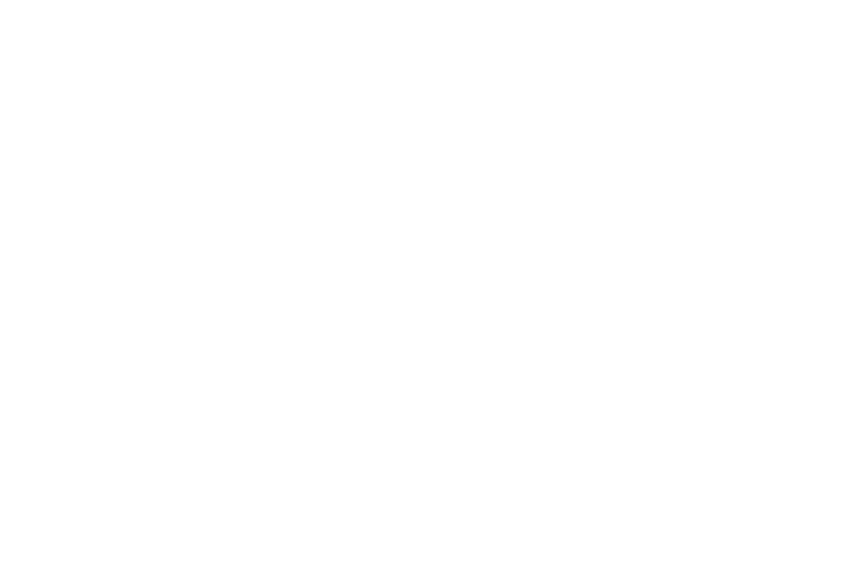

<IPython.core.display.Javascript object>


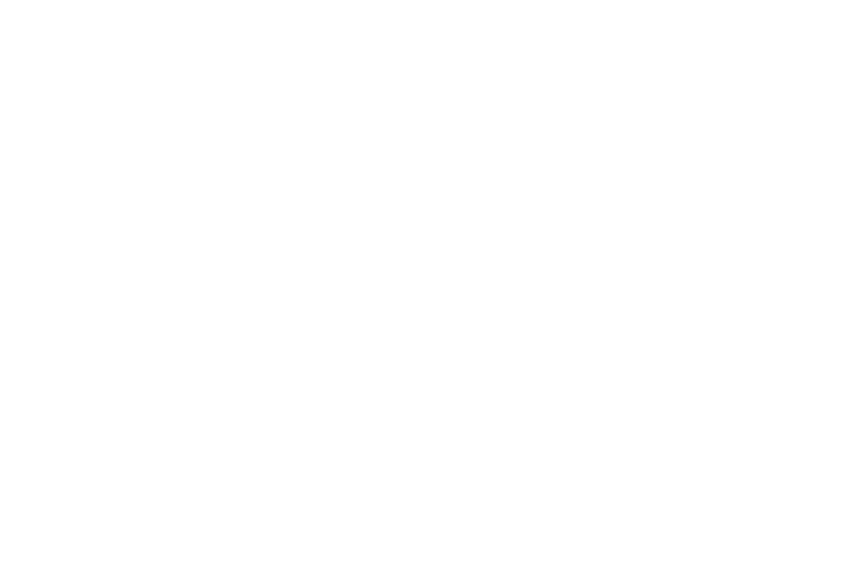

In [58]:
%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

i=0       #Inicializing the video display
fig = plt.figure()  # Create figure
im = plt.imshow(shots[2][i]-shots_back[2], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(shots[2][i]-shots_back[2]) #Changing the content of the canvas
    return im, #to return a tuple!

ani = animation.FuncAnimation(fig, updatefig1, blit=True, interval=1, repeat=False)
plt.show()


Comment your implementation including details. What happens if the shots are not correctly extracted? What happens if you find too many shots in the video? What do the static background images represent? In which situations does the algorithm work and in which it does not? What happens if you substract the background image from the original one?

Do you see any additional application for this algorithm?

-If our shot contains images from another shot because we didn't separate them correctly, the background substraction will be inaccurate and we will obtain a wrong result. 

-Finding too many shots in a video isn't really a problem, the problem is having not too many frames per shot cause we won't find enough information for each pixel to know which is the median value of it.

-The algorithm works well with shots that don't have too many changes in the luminosity. For example the first 2 shots of the video are affected by the luminosity changes that the sun produces therefore the background substraction is not very clear. On the other hand if we look at the 3rd shot, the background substraction works well because there is almost no change in the luminosity and when we animate the substraction of the background to see the foreground we can clearly see the clouds moving (the foreground).

We could use the algorithm to detect objects in a video, for example in a survillance camera we could notice if someone gets his/her bag stolen.

**[OPTIONAL]**
Apply the algorithm to some other static video that you found.

In [59]:
"""This is a video we have searched to try the algorithm. We have deliberately searched for a video with almost
no luminosity changes because the algorithm works better. Inspired by the example we saw in the theory powerpoint we
have searched for a mall video, with people in movement."""

#np.median
%matplotlib inline
from skimage.filters import threshold_adaptive
ic2 = io.ImageCollection('scene-mall/*.png')

background = np.zeros(ic2[0].shape)
red_channel = [ic2[0][:,:,0]]
green_channel = [ic2[0][:,:,1]]
blue_channel = [ic2[0][:,:,2]]
for i in range(1,len(ic2)):
    red_channel.append(ic2[i][:,:,0])
    green_channel.append(ic2[i][:,:,1])
    blue_channel.append(ic2[i][:,:,2])
background[:,:,0] = np.median(red_channel,axis = 0)
background[:,:,1] = np.median(green_channel,axis = 0)
background[:,:,2] = np.median(blue_channel,axis = 0)



    




<IPython.core.display.Javascript object>


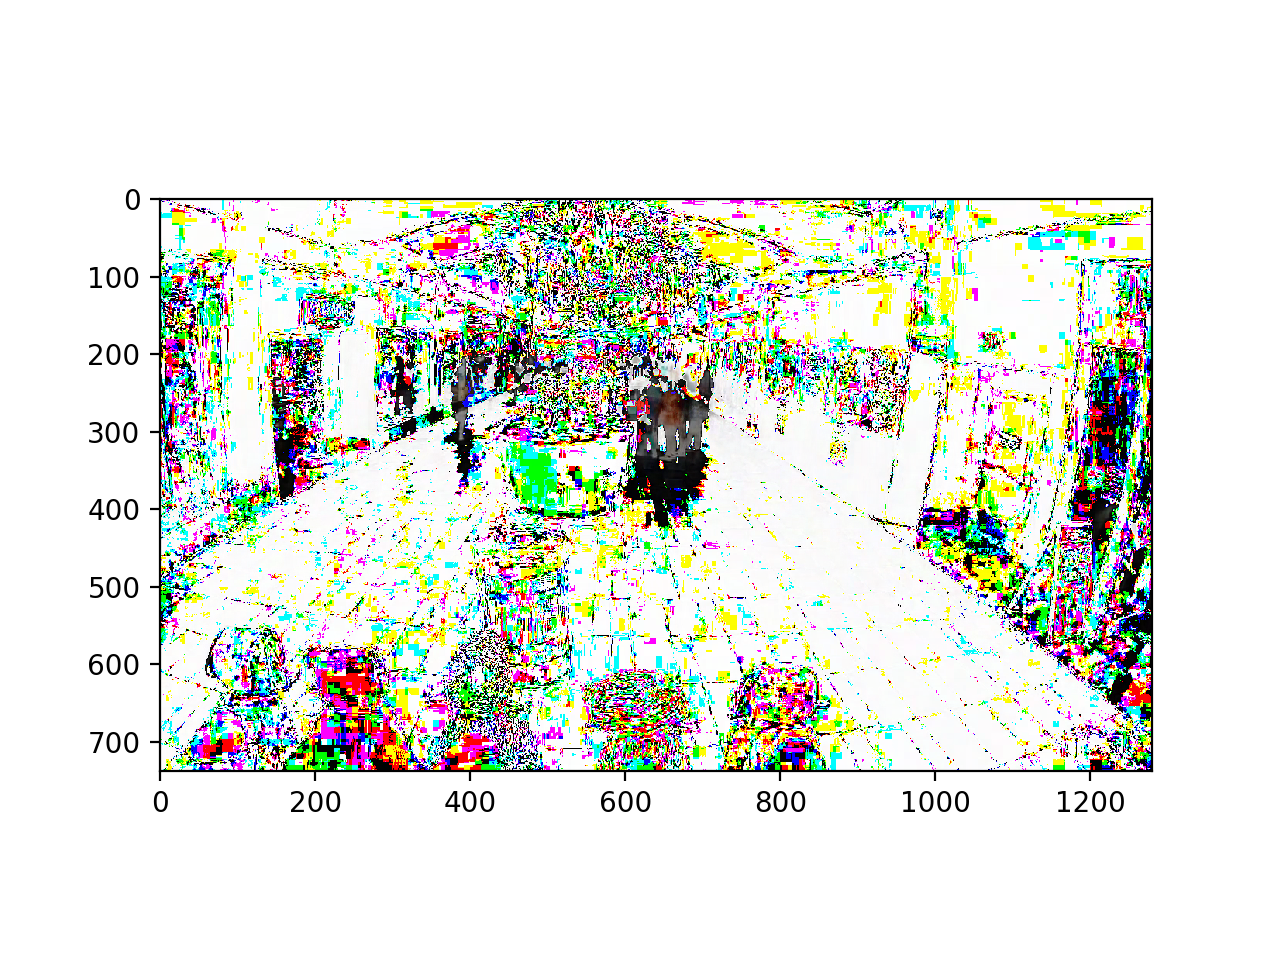

In [10]:
%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!


i=0       #Inicializing the video display
fig = plt.figure()  # Create figure
im = plt.imshow(ic2[i]-background, animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(ic2[i]-background) #Changing the content of the canvas
    return im, #to return a tuple!

ani = animation.FuncAnimation(fig, updatefig1, blit=True, interval=1, repeat=False)
plt.show()

"""We can clearly see how the people moving in the video are shadowed and the background is lighted."""

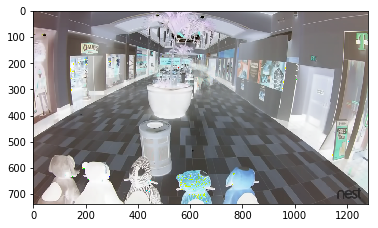

In [11]:
%matplotlib inline
plt.imshow(background)
plt.show()

## 3.3 Clustering methods on the RGB-XY space

a) Read any image from the folder 'images' and segment it using Felzenszwalbs's method. Test different parameters in order to obtain a good image segmentation. How does each parameter behave? Which are the optimal values? Comment what algorithm is the method based in up to 3 lines most.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline)
- Add title to the figures to explain what is displayed.

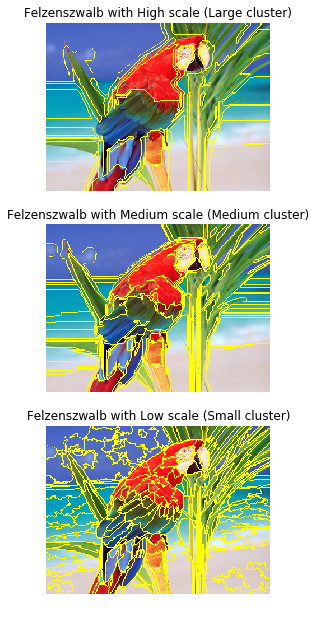

In [60]:
%matplotlib inline
from skimage import segmentation

img = io.imread("images/loro.png")

"""We can change the density of the segmentation (larger clusters, wich means less divisions and profundity)
by changing the scale parameter. For this image, and in general, using a value for the scale between 2.0 and 5.0 gives
us an optimum segmentated image."""


"""The algorithm used in this method is the minimum spanning tree. Edges are considered in increasing order of weight;
their endpoint pixels are merged into a region if this doesn't cause a cycle in the graph, and if the pixels are 
'similar' to the existing regions' pixels. """


segmented_fz_high = segmentation.felzenszwalb(img,100,5.0,100)
segmented_fz_low = segmentation.felzenszwalb(img,100,0.2,100)
segmented_fz_med = segmentation.felzenszwalb(img,100,2.0,100)

f, axarr = plt.subplots(3, 1) #in order to display the images in a grid we create an array of axes.
f.set_size_inches(18.5, 10.5)
    
axarr[0].imshow(segmentation.mark_boundaries(img,segmented_fz_high))
axarr[0].set_axis_off()
axarr[0].set_title("Felzenszwalb with High scale (Large cluster)")
axarr[1].imshow(segmentation.mark_boundaries(img,segmented_fz_med))
axarr[1].set_axis_off()
axarr[1].set_title("Felzenszwalb with Medium scale (Medium cluster)")
axarr[2].imshow(segmentation.mark_boundaries(img,segmented_fz_low))
axarr[2].set_axis_off()
axarr[2].set_title("Felzenszwalb with Low scale (Small cluster)")

plt.show()


b) Segment the previous image using SLIC algorithm. Test different parameters in order to obtain a good image segmentation. How does each parameter behave? Upt o your opinion, which are the optimal values? Comment what algorithm is the method based in up to 3 lines.

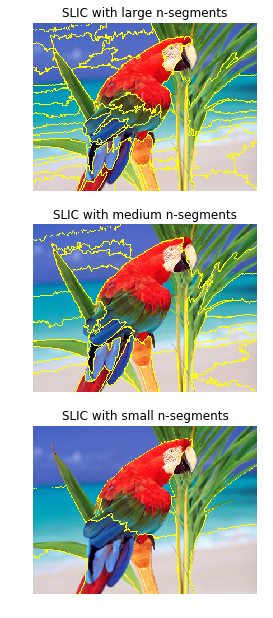

In [61]:
"""The optimal values for the paramaters are a value between 50 < n < 100 n_segments 
and compactness between 0 < n < 1 """

segmented_slic_highn = segmentation.slic(img, n_segments=100, compactness=0.1)
segmented_slic_midn = segmentation.slic(img, n_segments=50, compactness=0.1)
segmented_slic_lown = segmentation.slic(img, n_segments=10, compactness=0.1)


f, axarr = plt.subplots(3, 1) #in order to display the images in a grid we create an array of axes.
f.set_size_inches(18.5, 10.5)
    
axarr[0].imshow(segmentation.mark_boundaries(img,segmented_slic_highn))
axarr[0].set_axis_off()
axarr[0].set_title("SLIC with large n-segments")
axarr[1].imshow(segmentation.mark_boundaries(img,segmented_slic_midn))
axarr[1].set_axis_off()
axarr[1].set_title("SLIC with medium n-segments")
axarr[2].imshow(segmentation.mark_boundaries(img,segmented_slic_lown))
axarr[2].set_axis_off()
axarr[2].set_title("SLIC with small n-segments")

plt.show()

c) Plot the original image and the results of both algorithms in a 1x3 subplot. Calculate also the number of segments obtained on the image by each of the algorithms. Comment the differences between each method as well as their advantages and disadvantages.

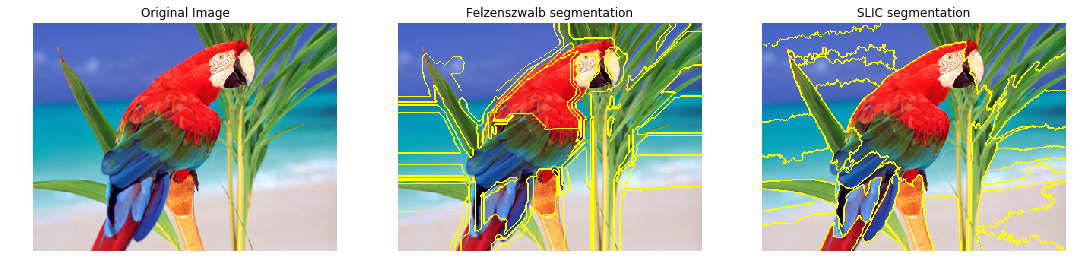

Felzenszwalb number of segments: 41
SLIC number of segments: 30


In [66]:
f, axarr = plt.subplots(1, 3) #in order to display the images in a grid we create an array of axes.
f.set_size_inches(18.5, 10.5)
    
axarr[0].imshow(img)
axarr[0].set_axis_off()
axarr[0].set_title("Original Image")
axarr[1].imshow(segmentation.mark_boundaries(img,segmented_fz_high))
axarr[1].set_axis_off()
axarr[1].set_title("Felzenszwalb segmentation")
axarr[2].imshow(segmentation.mark_boundaries(img,segmented_slic_midn))
axarr[2].set_axis_off()
axarr[2].set_title("SLIC segmentation")

plt.show()

print("Felzenszwalb number of segments: " + str(len(np.unique(segmented_fz_high))))
print("SLIC number of segments: " + str(len(np.unique(segmented_slic_midn))))